# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [2]:
easyvisa = pd.read_csv('EasyVisa.csv')

In [3]:
data = easyvisa.copy()

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
data.shape

(25480, 12)

- The dataset has 25,480 rows and 12 columns


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are 9 categorical variables and 3 numeric variables

In [8]:
# checking for null values
data.isnull().sum()


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

* There are no missing value in the data

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

There are no duplicate values in the data.

In [10]:
#### Dropping the columns with all unique values
data.case_id.nunique()

25480

* The `case_id` column contains only unique values, so we can drop it

In [11]:
data = data.drop(["case_id"], axis = 1)

### Statistical summary of the data

In [12]:
# Summary of continuous columns
data[['no_of_employees','prevailing_wage']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- No_of_employees has negative value which does not make sense. Therefore, we need to treat negative values of this columns. This also leads to incorrect value of mean, median. 
- The prevailing_wage has minimum value of 2.1 usd, and maximum value of 319,210 usd. However, the units of prevailing wage are hourly, weekly, monthly and annually, so we need to convert into one category for better comparation.

#### Fixing the negative values in number of employees columns

In [13]:
data.loc[data["no_of_employees"]<0].shape

(33, 11)

In [14]:
# convert all negative value in column no_of_employees to positive value 

data['no_of_employees'] = data['no_of_employees'].abs()

In [15]:
# checking to make sure there are no negative value
data.loc[data["no_of_employees"]<0].shape


(0, 11)

#### Let's check the count of each unique category in each of the categorical variables

In [16]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

## Exploratory Data Analysis

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='tab10',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
def stacked_barplot(data, predictor, target, perc=True):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 4, 4))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()
    

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

In [21]:
# function to create labeled barplots


def labeled_barplot1(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

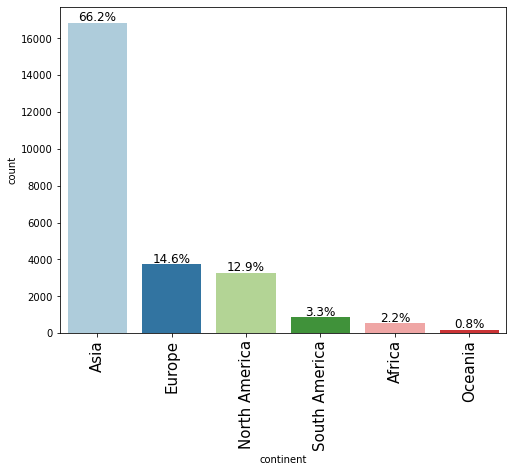

In [22]:
labeled_barplot1(data, "continent", perc=True) 

- Around 2/3 of applicants from Asia, followed by Europe and North America

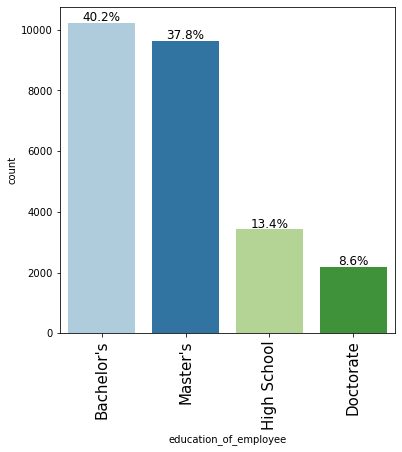

In [23]:
labeled_barplot1(data, "education_of_employee", perc=True) 

- Holding Bachelor and Master degree are very popular among employee.
- Less than 10% applicants have Doctorate degree.


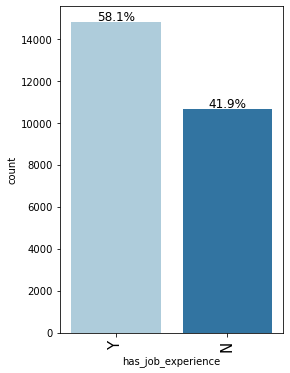

In [24]:
labeled_barplot1(data, "has_job_experience", perc=True) 

- The people having experience tend to apply for US working visa rather than who never work before

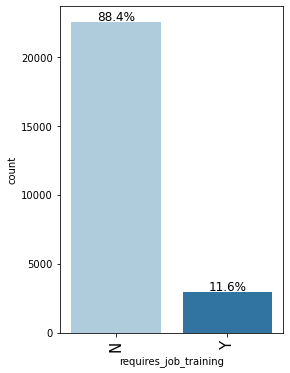

In [25]:
labeled_barplot1(data, "requires_job_training", perc=True) 

- Since most of applicants already have relevant skill set. Therefore, almost 90% of the job does not include training

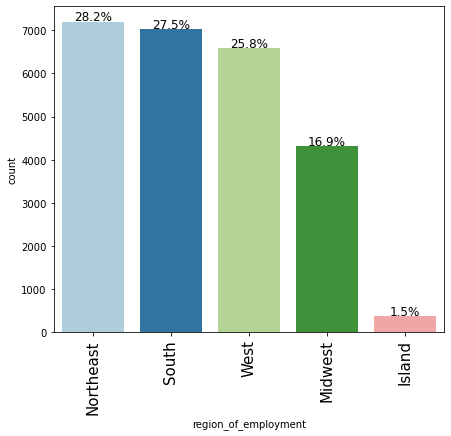

In [26]:
labeled_barplot1(data, "region_of_employment", perc=True) 

- Norteast, South and West are top three regions attracting foreign workers

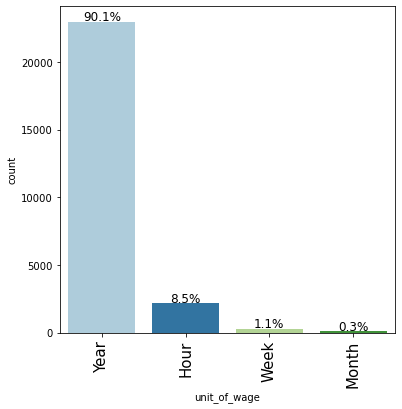

In [27]:
labeled_barplot1(data, "unit_of_wage", perc=True) 

- Annual paid is the most common in the US

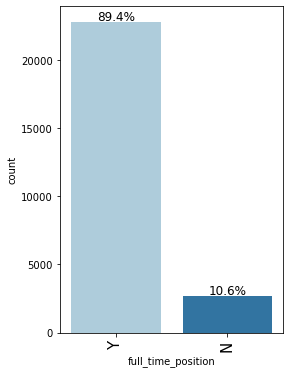

In [28]:
labeled_barplot1(data, "full_time_position", perc=True) 

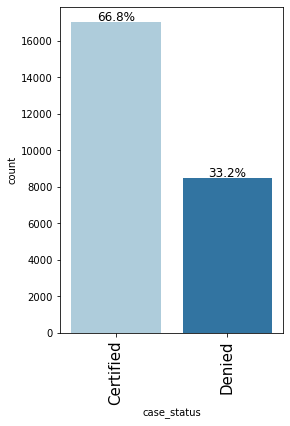

In [29]:
labeled_barplot1(data, "case_status", perc=True) 

- The ratio betwee Certified and Denied case are approximately 70:30

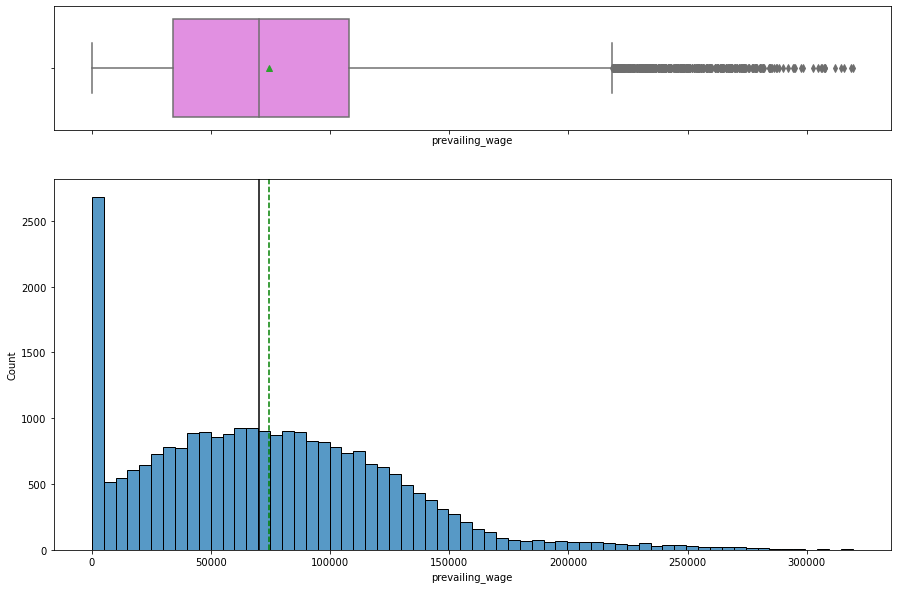

In [30]:
 #stacked_barplot(data,'case_status','prevailing_wage')
histogram_boxplot(data, "prevailing_wage", figsize=(15, 10), kde=False, bins=None)

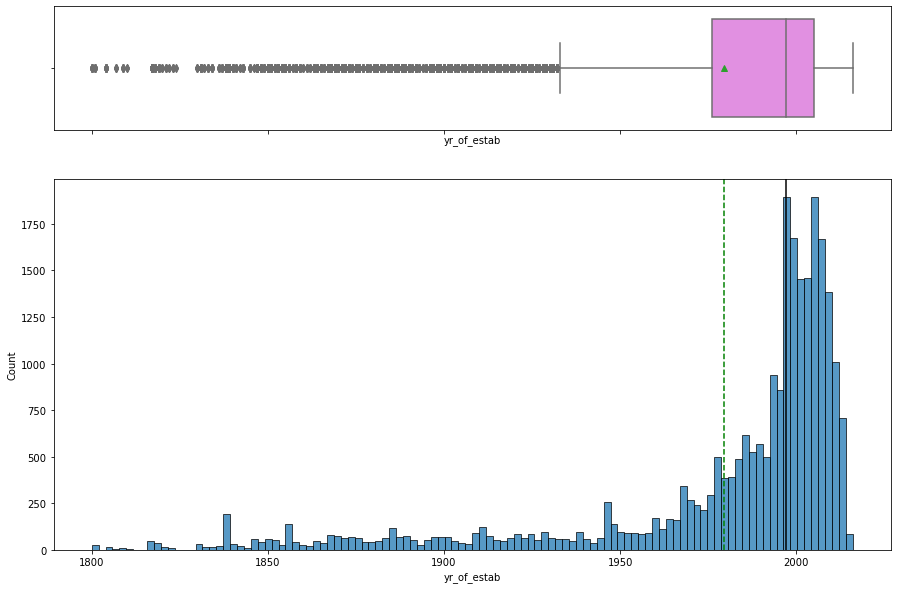

In [31]:
histogram_boxplot(data, "yr_of_estab", figsize=(15, 10), kde=False, bins=None)

- The esbtablishing year has left - skewed distribution

### Bivariate Analysis

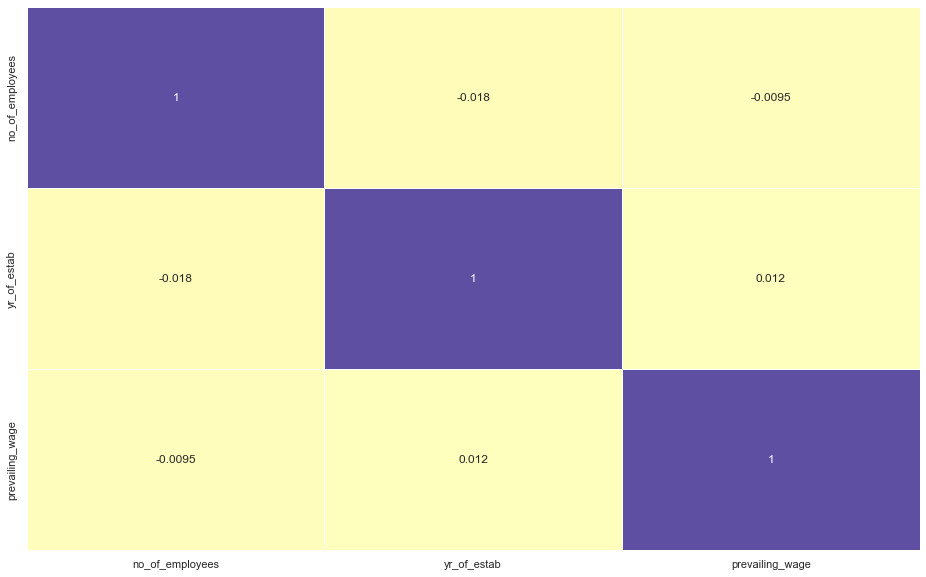

In [32]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

- There are no strong relationship between variable

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

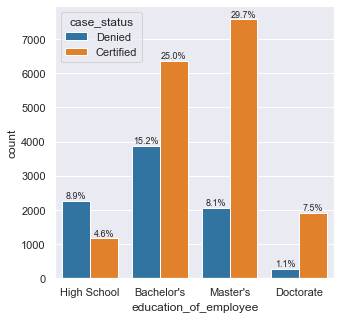

In [33]:
labeled_barplot(data,'education_of_employee','case_status', order = ["High School","Bachelor's","Master's","Doctorate"], perc = True)

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


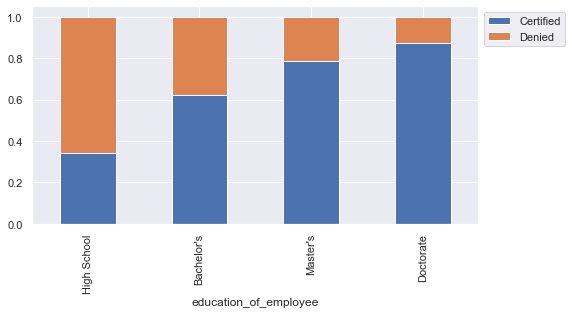

In [34]:
stacked_barplot(data,'education_of_employee','case_status', perc = True)



- As show on the graph, the ratio of certified case increase when apllicant has higher education.

2. How does the visa status vary across different continents? (Observation of Continent)

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


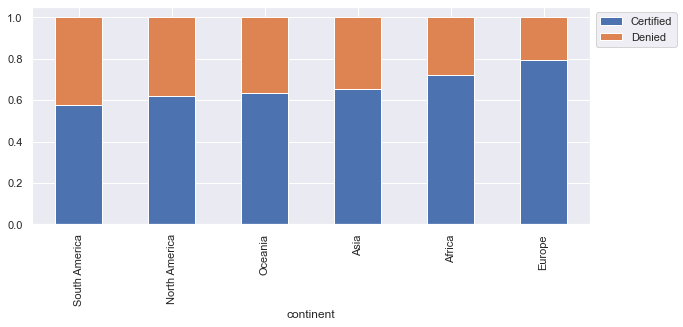

In [35]:
stacked_barplot(data,'continent','case_status')



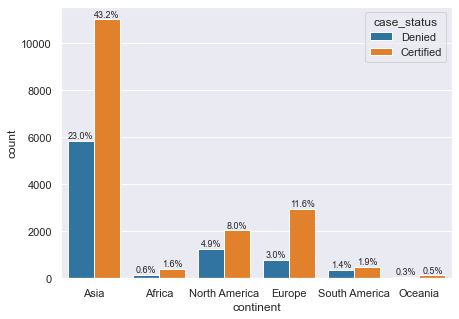

In [36]:
labeled_barplot(data,'continent','case_status', order = None , perc = True)

- Overall, Europe, Africa and Asia are top 3 continents with highest approved cases (about 65%).
- The volume of applicant from Asia is the highest
- Meanwhile, South America has lowest proportion of certified case (below 60%)


3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 


case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


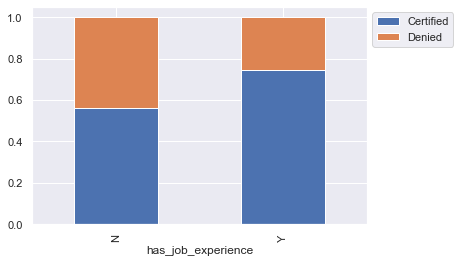

In [37]:
stacked_barplot(data,'has_job_experience','case_status')



- People with work experienced definitely have higher chance to get the visa

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


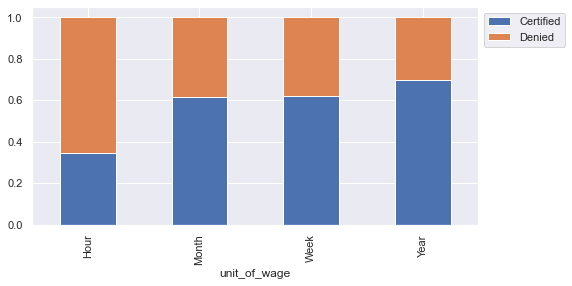

In [38]:
stacked_barplot(data,'unit_of_wage','case_status')



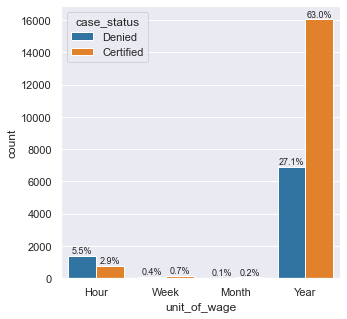

In [39]:
labeled_barplot(data,'unit_of_wage','case_status', order = ['Hour', 'Week', 'Month', 'Year'] , perc = True)

- The most common wage unit is paid annually. Paying by hour, week, month contribute a very small fraction of total applicant.
- Paying by week, month and year have relatively higher certified case rate (above 60%), while hour paid unit has the lowest successful rate (around 38%)


5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

- The boxplot shows that the median prevailing wage of Certified case is slightly greater than that of denied case 
- Both wage distributions of certified and denied case are right-skewed

#### Observations on number of employees

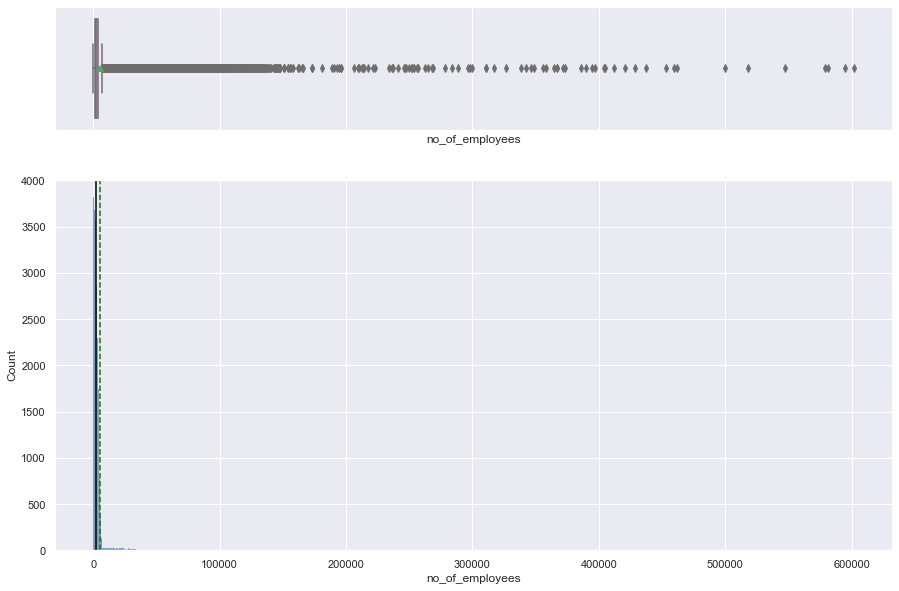

In [40]:
histogram_boxplot(data,'no_of_employees', bins = 1000)

#### Observations on prevailing wage


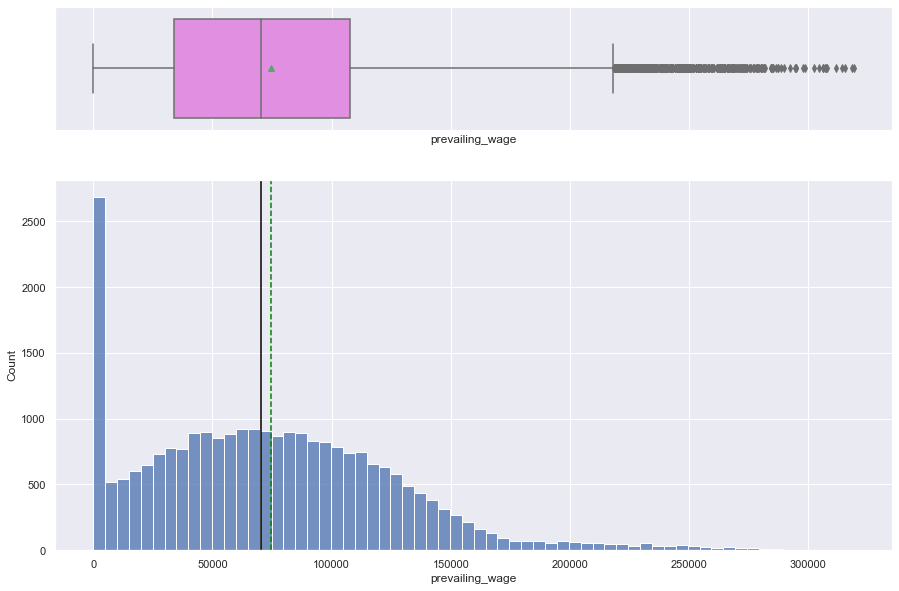

In [41]:
histogram_boxplot(data,'prevailing_wage')

- There are so many jobs with low income (less than 5000 usd) so we take a closer look into those jobs. 

In [42]:
prevailing_wage_under5000 = data.loc[data["prevailing_wage"] < 5000]

In [43]:
prevailing_wage_under5000.groupby(['unit_of_wage'])['case_status'].count()


unit_of_wage
Hour     2157
Month       3
Week        4
Year      518
Name: case_status, dtype: int64

- Most of the low-paid jobs are paid by hours. 

In [44]:
# calculating the mean of prevailing_wage 
data.groupby(['unit_of_wage'])['prevailing_wage'].mean()

unit_of_wage
Hour       414.570513
Month    87592.864045
Week     85606.820515
Year     81228.077133
Name: prevailing_wage, dtype: float64

- It seems that prevailing_wage of hour is calculated by day, while other unit_of_wage are yearly


In [45]:
# Create a subset of the data containing only unit_of_wage by hour
data_hour = data[data.unit_of_wage == "Hour"]
data_hour.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
54,Asia,Master's,Y,N,11733,1995,Northeast,230.8072,Hour,Y,Certified
62,Asia,High School,N,N,5110,2004,West,103.2216,Hour,Y,Denied
70,Asia,High School,Y,N,1320,2001,Northeast,230.3270,Hour,Y,Denied


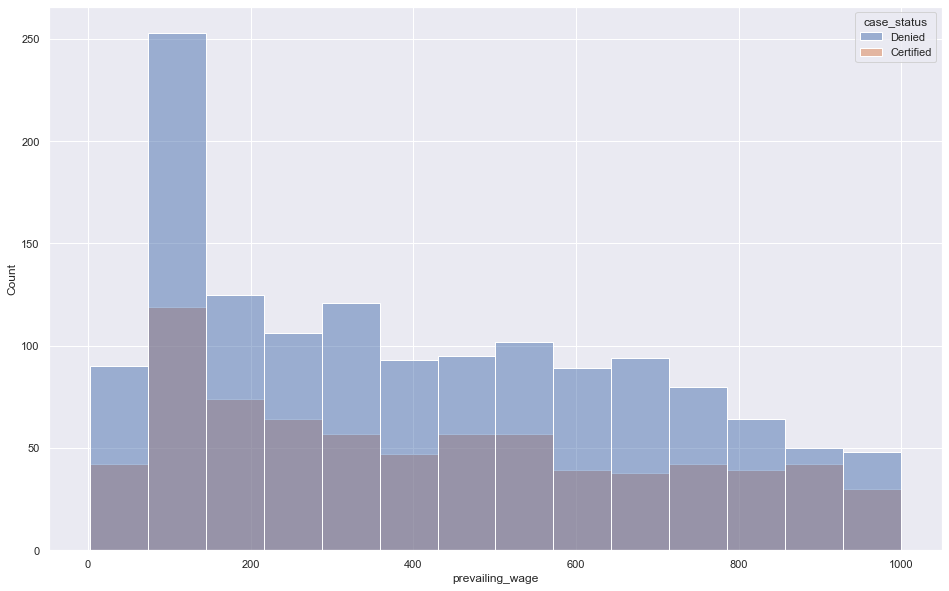

In [46]:
sns.histplot(data = data_hour, x = "prevailing_wage", hue = "case_status")
plt.show()

In [47]:
# Create a subset of the data containing only unit_of_wage by week, month and year
data_annual = data.loc[(data['unit_of_wage'] == "Week") | (data['unit_of_wage'] == "Month") | (data['unit_of_wage'] == "Year")]
data_annual.head ()


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified


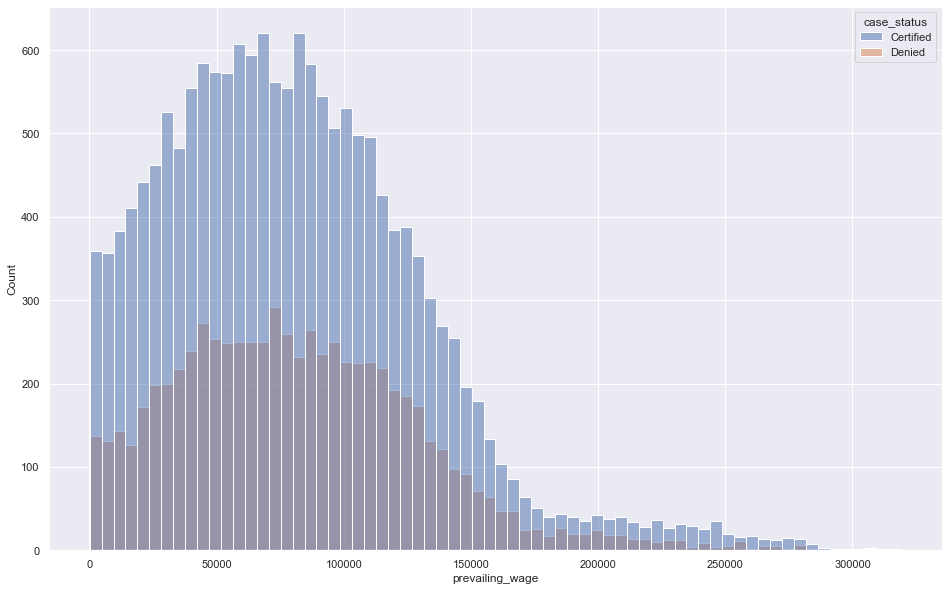

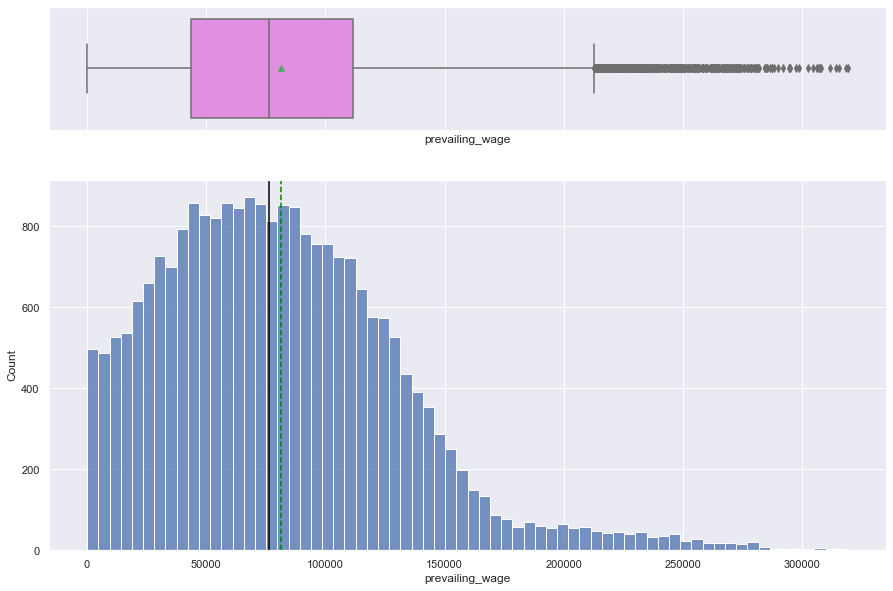

In [48]:
sns.histplot(data = data_annual, x = "prevailing_wage", hue = "case_status")
plt.show()
histogram_boxplot(data_annual, "prevailing_wage", figsize=(15, 10), kde=False, bins=None)



- Wage has right - skewed distribution. The ratio between certified and denied case remains the same as salary increasing


#### Observation on Job experience


case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


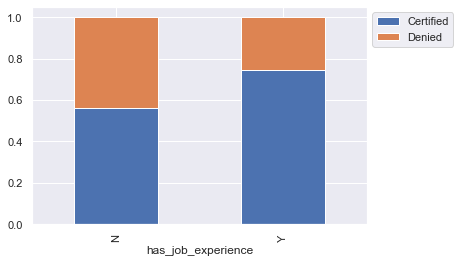

In [49]:
stacked_barplot(data,'has_job_experience','case_status', perc = True)



- The employee who has job experience would have more chance to get the visa

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


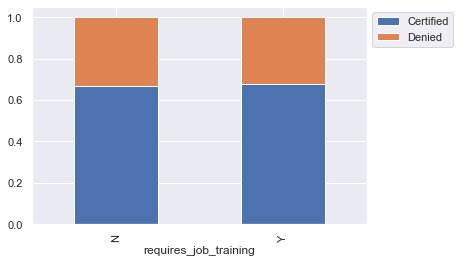

In [50]:
stacked_barplot(data,'requires_job_training','case_status', perc = True)



- The proportion of denied and certified case remains unchange when it comes to job training requirement

- The established year of the company has left-skewed distribution with lots of outliners toward the left of the chart 


case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


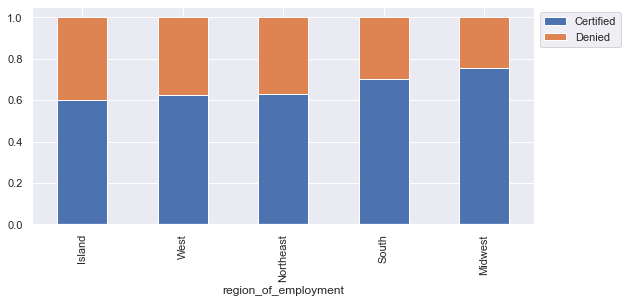

In [51]:
stacked_barplot(data,'region_of_employment','case_status', perc = True)



- All of the regions have pretty much similar approval rate (ranging from 60% to 75%)

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


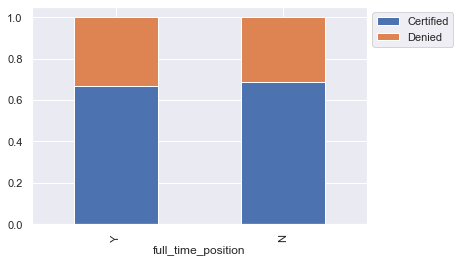

In [52]:
stacked_barplot(data,'full_time_position','case_status', perc = True)



- Full-time or part-time position have similar approval rate


### Outlier Check

- Let's check for outliers in the data.

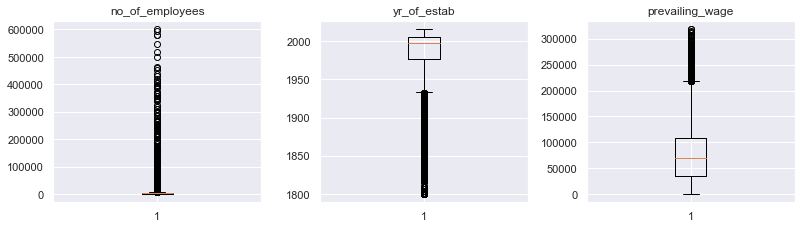

In [53]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are outliers in the data.
* However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [54]:
# drop case status from the data

data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
X = data.drop(["case_status"] , axis = 1)
y = data["case_status"]


# create dummies for X  
X = pd.get_dummies(X, drop_first=True) 

X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.3, random_state=1,stratify=y)

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree - Model Building and Hyperparameter Tuning

### Decision Tree Model

In [58]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

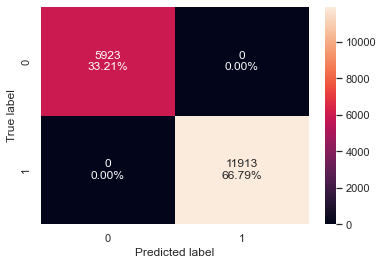

In [59]:
confusion_matrix_sklearn(d_tree, X_train, y_train)

In [60]:
decision_tree_perf_train = model_performance_classification_sklearn(d_tree,X_train,y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

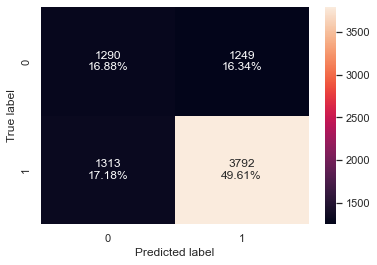

In [61]:
confusion_matrix_sklearn(d_tree, X_test, y_test)

In [62]:
decision_tree_perf_test = model_performance_classification_sklearn(d_tree,X_test,y_test 
                                                                   )
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


- The decision tree is working well on training set, however, it does not performce well on test set.
- The model is overfitting


### Hyperparameter Tuning - Decision Tree

In [63]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking tuned model performance on training set

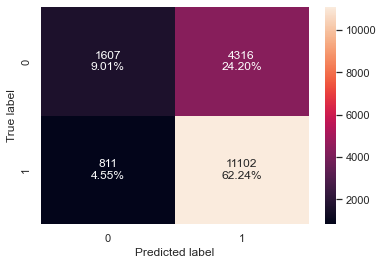

In [64]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [65]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


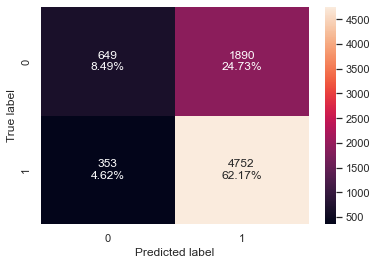

In [66]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [67]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


- Accuracy, recall and F1 increase after tuning the model, especially F1 score
- The tuned decision tree is giving a generalized performces

## Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [68]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

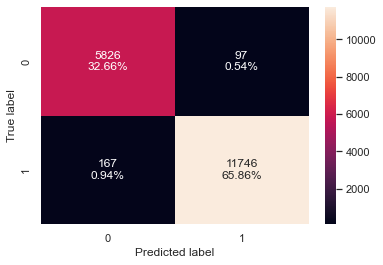

In [69]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [70]:
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

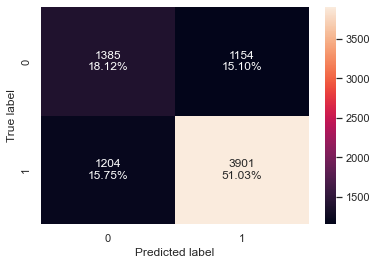

In [71]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [72]:
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


- The model is ovefitting and not performing well on the test data

### Hyperparameter Tuning - Bagging Classifier

In [73]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

#### Checking model performance on training set

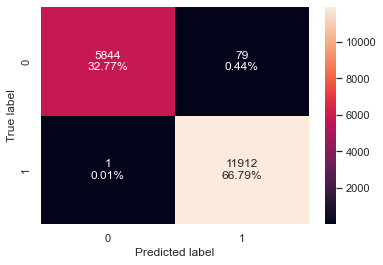

In [74]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [75]:
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.995515,0.999916,0.993412,0.996653


#### Checking model performance on test set

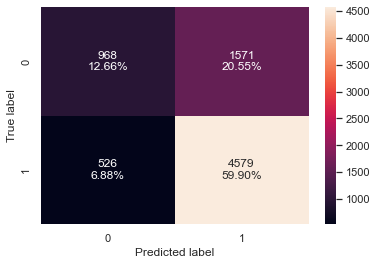

In [76]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [77]:
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.725667,0.896964,0.744553,0.813683


- The model is ovefitting and not performing well on the test data

### Random Forest

In [78]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

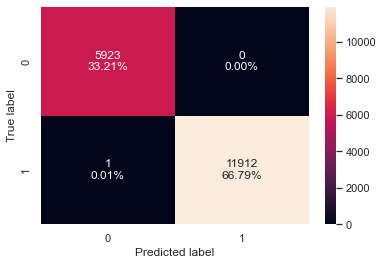

In [79]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [80]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


#### Checking model performance on test set

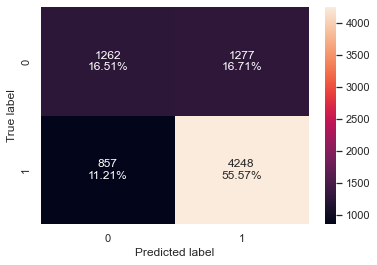

In [81]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [82]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)

In [83]:
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


- The model is ovefitting and not performing well on the test data

### Hyperparameter Tuning - Random Forest

In [84]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=5,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=20, random_state=1)

#### Checking model performance on training set

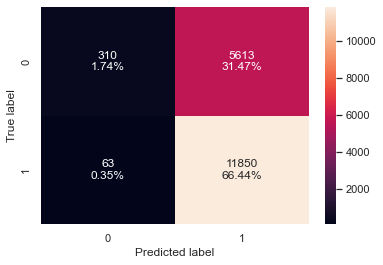

In [85]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [86]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.681767,0.994712,0.678578,0.806781


#### Checking model performance on test set

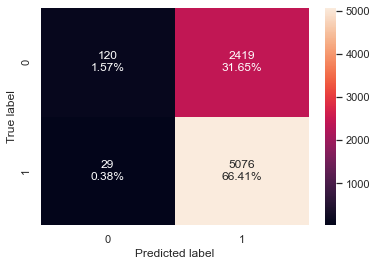

In [87]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [88]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.679749,0.994319,0.677252,0.805714


In [89]:
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


- After tuning the random forest model, F1 and recall increase, while, accuracy and precision decrease.


## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier

In [90]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set

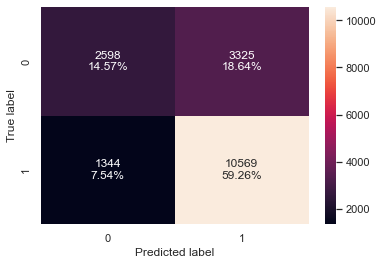

In [91]:
confusion_matrix_sklearn(abc,X_train,y_train)

In [92]:
abc_model_train_perf=model_performance_classification_sklearn(abc,X_train,y_train)
abc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

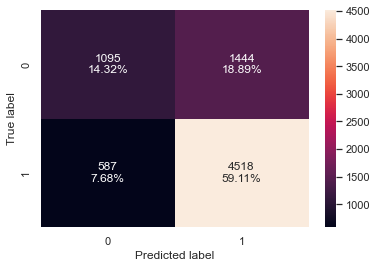

In [93]:
confusion_matrix_sklearn(abc,X_test,y_test)

In [94]:
abc_model_test_perf=model_performance_classification_sklearn(abc,X_test,y_test)
abc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


- This AdaBoost classifer performs equally well on the training and testing datasets, indicating that the model is not overfit.

### Hyperparameter Tuning - AdaBoost Classifier

In [95]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set

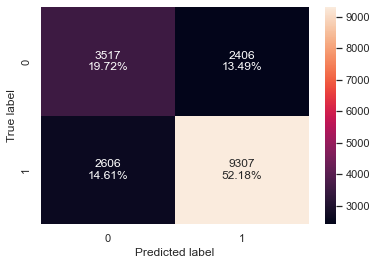

In [96]:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [97]:
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking model performance on test set

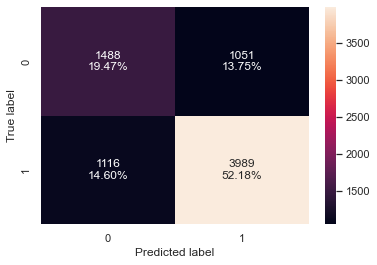

In [98]:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [99]:
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


### Gradient Boosting Classifier

In [100]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

#### Checking model performance on training set

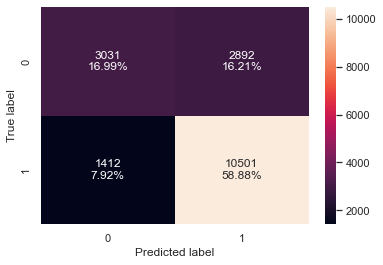

In [101]:
confusion_matrix_sklearn(gbc_init,X_train,y_train)

In [102]:
gbc_init_model_train_perf=model_performance_classification_sklearn(gbc_init,X_train,y_train)
gbc_init_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75869,0.881474,0.784066,0.829922


#### Checking model performance on test set

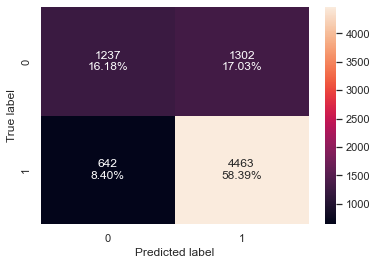

In [103]:
confusion_matrix_sklearn(gbc_init,X_test,y_test)

In [104]:
gbc_init_model_test_perf=model_performance_classification_sklearn(gbc_init,X_test,y_test)
gbc_init_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745683,0.874241,0.774154,0.821159


### Hyperparameter Tuning - Gradient Boosting Classifier

In [105]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set

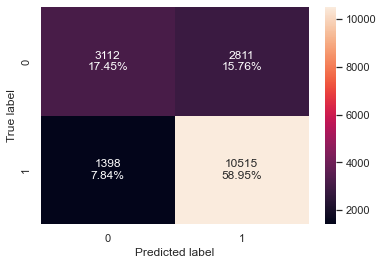

In [106]:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [107]:
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking model performance on test set

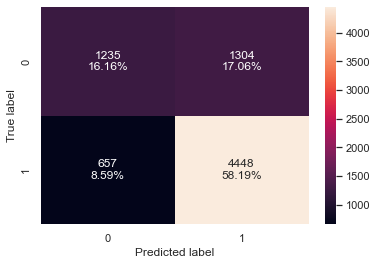

In [108]:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [109]:
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


## Stacking Classifier

In [110]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator= gbc_tuned

In [111]:
stacking_classifier= StackingClassifier (estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=3,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.35,
                                                                     1: 0.65},
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                              

#### Checking model performance on training set

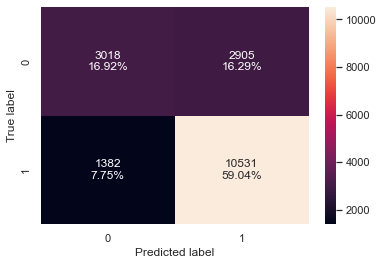

In [112]:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [113]:
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.759643,0.883992,0.78379,0.830881


#### Checking model performance on test set

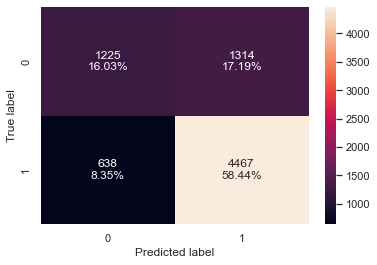

In [114]:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [115]:
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.875024,0.772704,0.820687


## Model Performance Comparison and Final Model Selection

In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [ 
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        abc_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_init_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.995515,0.999944,0.681767,0.738226,0.718995,0.758690,0.764017,0.759643
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.994712,0.887182,0.781247,0.881474,0.882649,0.883992
Precision,1.0,0.720067,0.991810,0.993412,1.000000,0.678578,0.760688,0.794587,0.784066,0.789059,0.783790
F1,1.0,0.812411,0.988887,0.996653,0.999958,0.806781,0.819080,0.787861,0.829922,0.833234,0.830881


In [117]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [               
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        abc_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_init_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.725667,0.720827,0.679749,0.734301,0.716510,0.745683,0.743459,0.744636
Recall,0.742801,0.930852,0.764153,0.896964,0.832125,0.994319,0.885015,0.781391,0.874241,0.871303,0.875024
Precision,0.752232,0.715447,0.771711,0.744553,0.768869,0.677252,0.757799,0.791468,0.774154,0.773296,0.772704
F1,0.747487,0.809058,0.767913,0.813683,0.799247,0.805714,0.816481,0.786397,0.821159,0.819379,0.820687


- After tuning, decision tree, bagging, random forest perform better
- Gradient Boost is the best performer (the highest F1 score)



### Important features of the final model

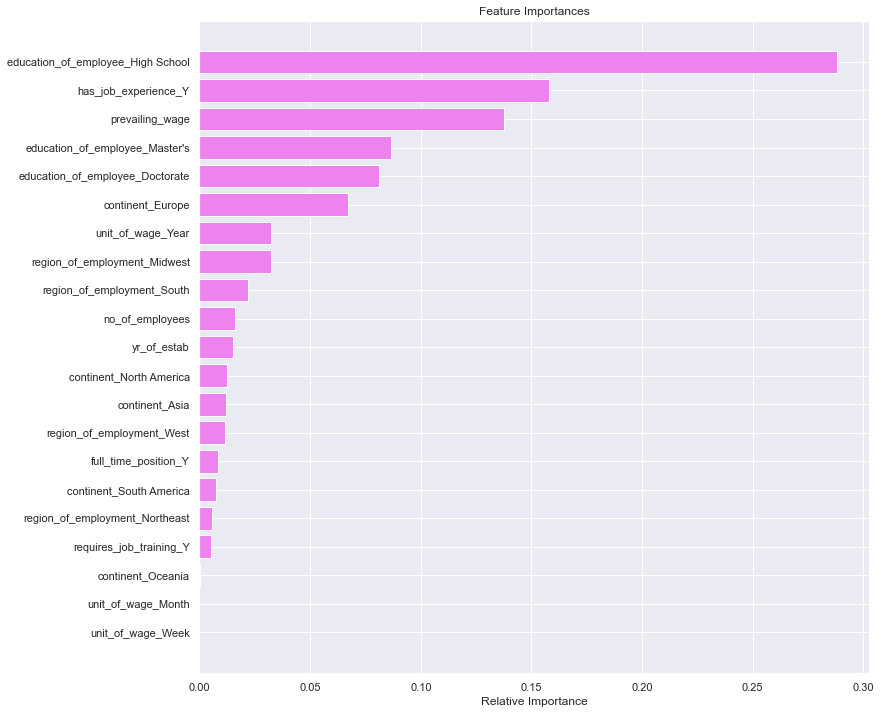

In [118]:
feature_names = X_train.columns
importances = gbc_init.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

#### Insights

- The most three important features that affect the approval rate of the visa is:
1. Education level: the employees holding higher education have more chance to get the visa.
2. Job Experience: the US labor market prefers skilled - workers who already have experiences.
3. Prevailing wage: the higher the prevailing wage of the job an applicant is applying for, the more likely the application will be approved. 

#### Recommendations
In order to save time and resource, the OFLC can:
- Pay more attention to applicant education.
- Prioritize the employee having relevant experiences
- Distingish between unit_of_paid (daily or annually).
